In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt





In [22]:
(X, y), _ = tf.keras.datasets.cifar10.load_data()
X = X.astype("float32") / 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])


Epoch 1/10
1250/1250 [==============================] - 88s 69ms/step - loss: 1.5247 - accuracy: 0.4387 - val_loss: 1.2248 - val_accuracy: 0.5523
Epoch 2/10
1250/1250 [==============================] - 85s 68ms/step - loss: 1.0828 - accuracy: 0.6127 - val_loss: 0.9675 - val_accuracy: 0.6577
Epoch 3/10
1250/1250 [==============================] - 89s 71ms/step - loss: 0.8771 - accuracy: 0.6903 - val_loss: 0.8832 - val_accuracy: 0.6901
Epoch 4/10
1250/1250 [==============================] - 101s 81ms/step - loss: 0.7402 - accuracy: 0.7379 - val_loss: 0.8174 - val_accuracy: 0.7166
Epoch 5/10
1250/1250 [==============================] - 90s 72ms/step - loss: 0.6360 - accuracy: 0.7746 - val_loss: 0.8314 - val_accuracy: 0.7112
Epoch 6/10
1250/1250 [==============================] - 86s 69ms/step - loss: 0.5477 - accuracy: 0.8073 - val_loss: 0.8821 - val_accuracy: 0.7144
Epoch 7/10
1250/1250 [==============================] - 91s 73ms/step - loss: 0.4683 - accuracy: 0.8339 - val_loss: 0.8664 

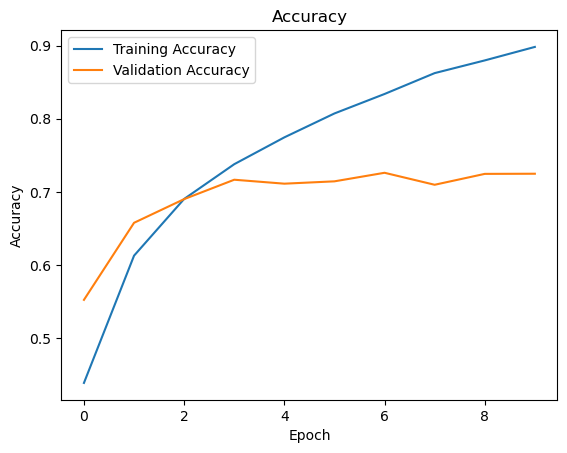

In [27]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()


In [28]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

313/313 [==============================] - 7s 23ms/step - loss: 1.0384 - accuracy: 0.7248
Test accuracy: 0.7247999906539917
